Movie Rating Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset upload

In [5]:
#load the data from the csv file
movie_data = pd.read_csv('/content/IMDb_Movies_India.csv',encoding='latin-1')

In [16]:
#print the top 5 data from the dataset
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
movie_data.shape

(5659, 10)

In [18]:
movie_data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [19]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [20]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [21]:
movie_data.dropna(subset=["Rating"], inplace = True)

In [22]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [14]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [23]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [24]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [25]:
# convert votes columns
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

In [26]:
# convert year columns
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

In [27]:
# convert duration columns
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [29]:
# convert duration columns
movie_data['Duration'] = movie_data['Duration'].str.strip('min').astype(float)
#fillna on duration column
movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True)

<ipython-input-29-48f44999000c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True)


In [30]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [32]:
# find top 10 movies based on rating
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
print(top_movie)

                      Name  Year  Duration                         Genre  \
8339       Love Qubool Hai  2020      94.0                Drama, Romance   
5410            Half Songs  2021      79.0                Music, Romance   
6852                  June  2021      93.0                         Drama   
14222  The Reluctant Crime  2020     113.0                         Drama   
5077          Gho Gho Rani  2019     105.0              History, Romance   
1314          Ashok Vatika  2018      97.0                         Drama   
13231           Sindhustan  2019      64.0  Documentary, Family, History   
8344          Love Sorries  2021     101.0        Comedy, Drama, Romance   
12673   Secrets of Sinauli  2021      56.0          Documentary, History   
11843              Refl3ct  2021      65.0                        Sci-Fi   

       Rating  Votes         Director            Actor 1          Actor 2  \
8339     10.0      5  Saif Ali Sayeed          Ahaan Jha   Mahesh Narayan   
5410     

Distribution of top 10 movies

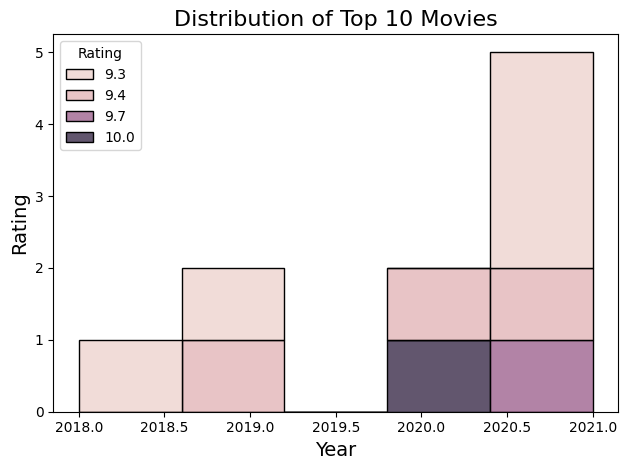

In [33]:
# Distribution of top 10 movies
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

Distribution of category of movies

In [34]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


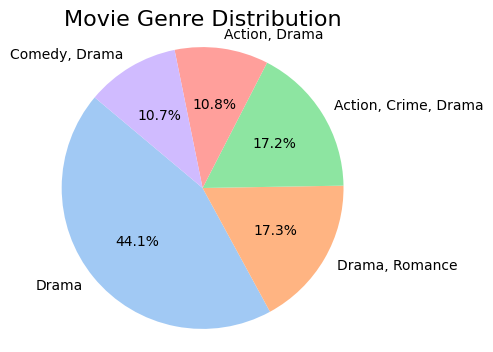

In [35]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

Distribution of top directors by average rating

In [36]:
# Group the data by director and calculate the average rating
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
print(top_directors)

             Director  Rating
1833  Saif Ali Sayeed    10.0
2107      Sriram Raja     9.7
1240     Munni Pankaj     9.4
2142   Suhrud Godbole     9.4
274     Arvind Pratap     9.4
2309     Venkatesh Bk     9.3
1921   Sapna Bhavnani     9.3
2387     Vishwa Bhanu     9.3
1528    Rahul Mallick     9.3
635      Gautam Joshi     9.3


<ipython-input-37-1edc1455cb1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')


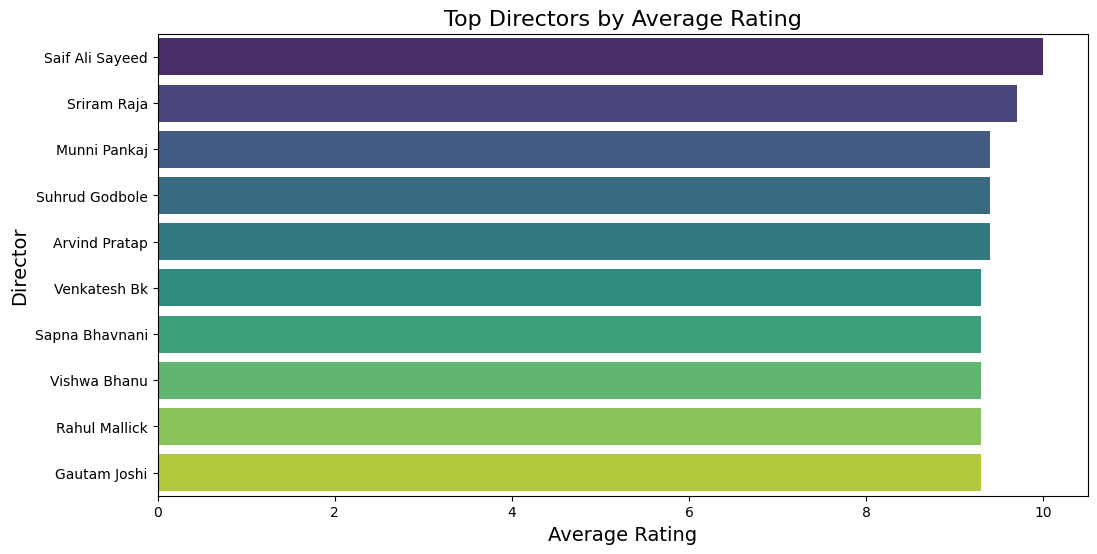

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

 Number of votes according to the movie ratings

Text(0, 0.5, 'Votes')

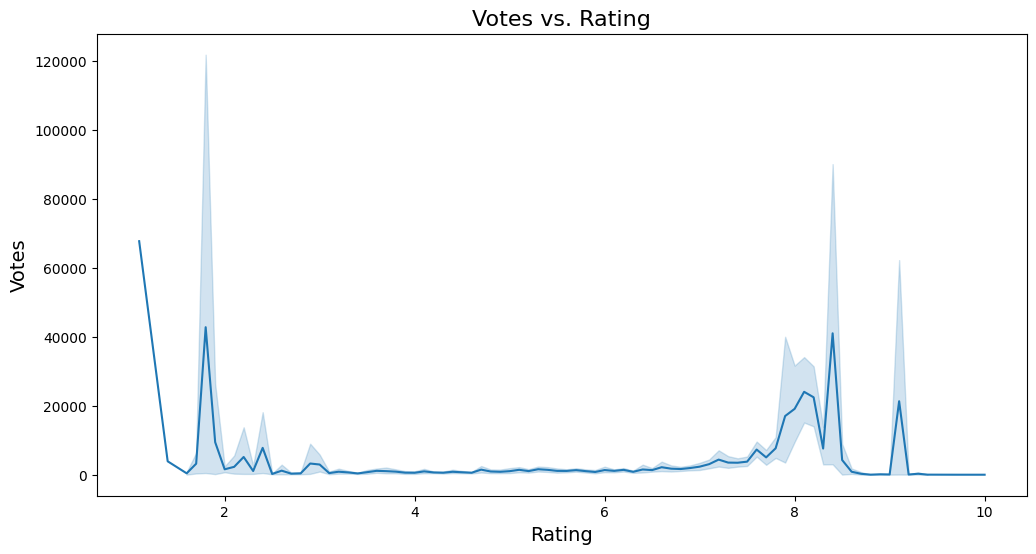

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

Top actors according to the movies

In [39]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
print(top_n_actors)

                Actor  MovieCount
0    Amitabh Bachchan         104
1  Mithun Chakraborty          93
2         Ashok Kumar          91
3          Dharmendra          90
4           Jeetendra          89
5        Akshay Kumar          82
6       Shashi Kapoor          81
7       Rajesh Khanna          74
8          Ajay Devgn          70
9         Sanjay Dutt          61


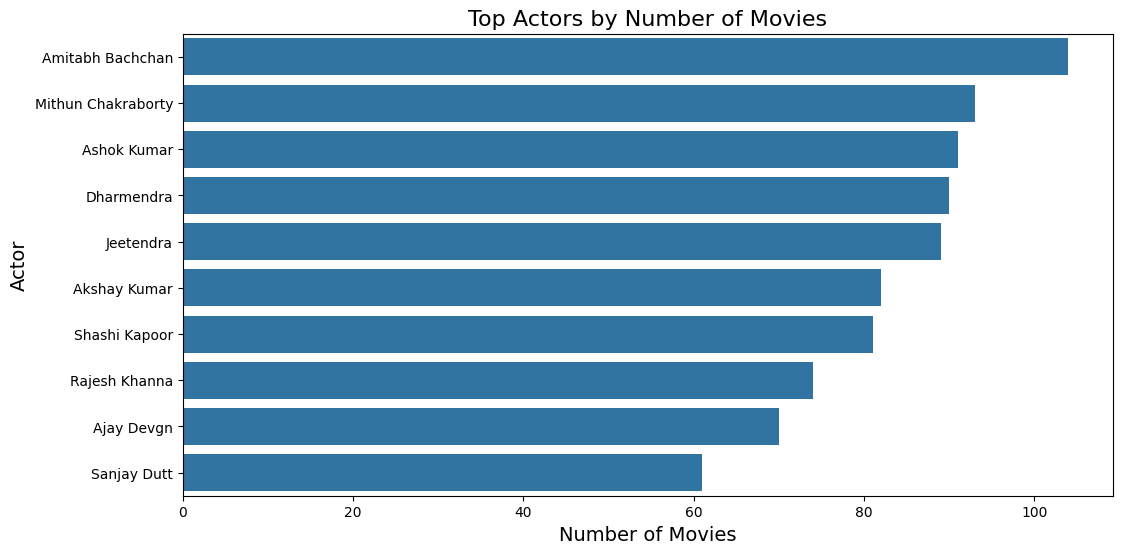

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

Number of movies released every year

In [41]:
yearly_movie_counts = movie_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
print(yearly_movie_counts)

    Year  MovieCount
86  1931           2
90  1932           1
89  1933           1
88  1934           2
81  1935           5
..   ...         ...
1   2017         211
2   2018         202
0   2019         227
9   2020         140
39  2021          63

[91 rows x 2 columns]


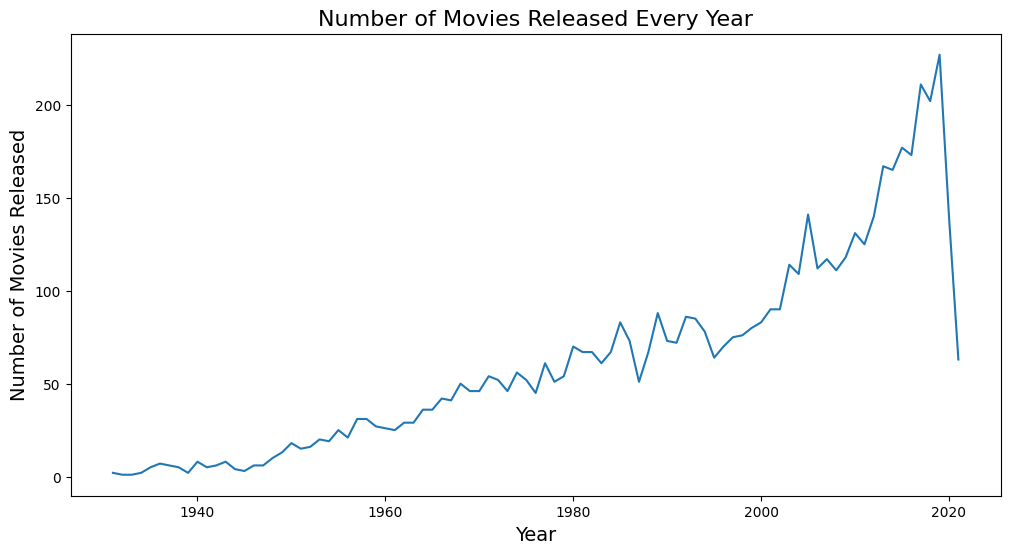

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

Movies rating greater than 8 and votes greater than 10000

In [43]:
filtered_df = movie_data[(movie_data['Rating'] > 8) & (movie_data['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139.0,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130.0,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151.0,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186.0,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122.0,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143.0,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-44-7992599c795c>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


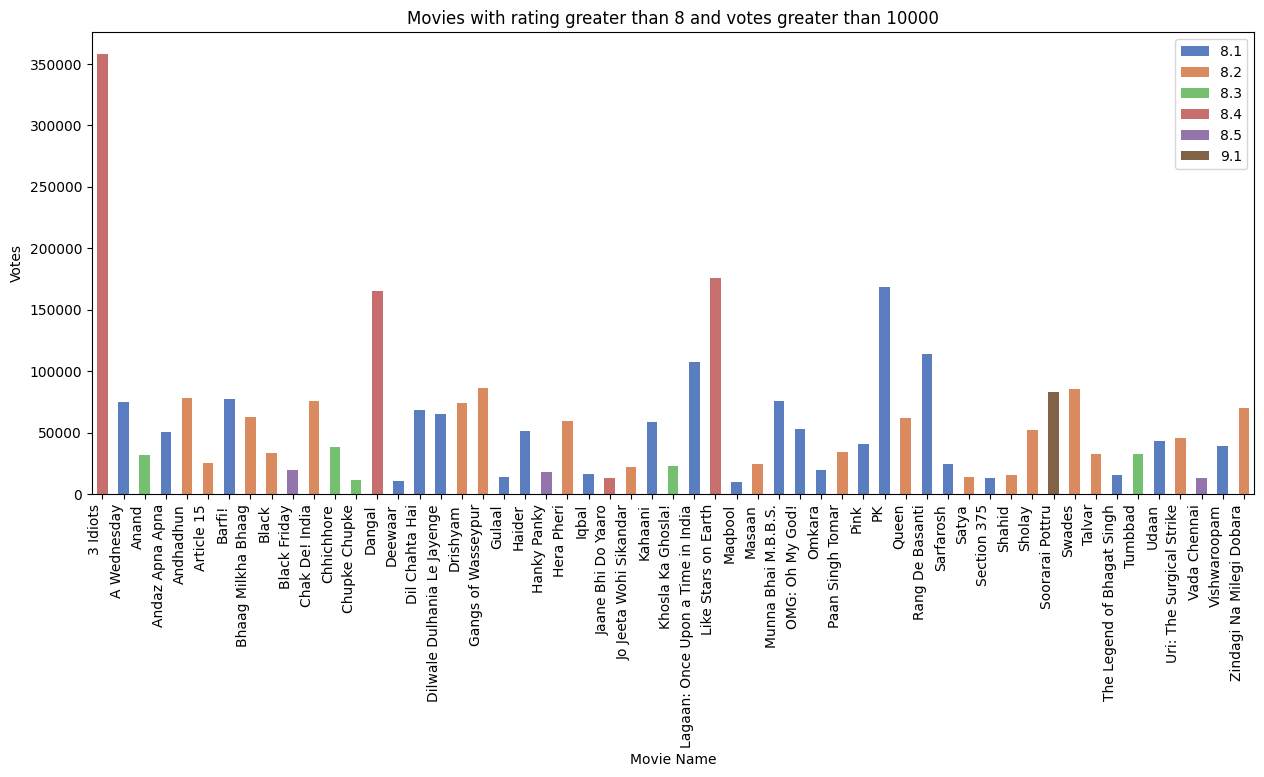

In [44]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')

plt.show()

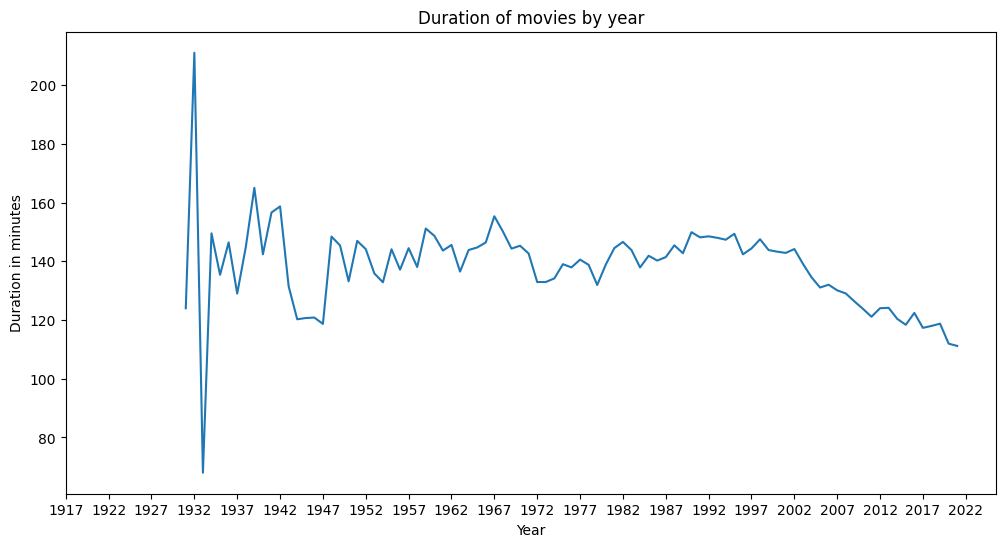

In [45]:
movie_data['Duration'] = movie_data['Duration'].astype(int)
movie_data['Year'] = movie_data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

In [46]:
movie_data['Genre'] = movie_data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre1 = movie_data.explode('Genre')
print(genre1)

                                     Name  Year  Duration     Genre  Rating  \
1      #Gadhvi (He thought he was Gandhi)  2019       109     Drama     7.0   
3                                 #Yaaram  2019       110    Comedy     4.4   
3                                 #Yaaram  2019       110   Romance     4.4   
5                    ...Aur Pyaar Ho Gaya  1997       147    Comedy     4.7   
5                    ...Aur Pyaar Ho Gaya  1997       147     Drama     4.7   
...                                   ...   ...       ...       ...     ...   
15503                     Zulm Ki Zanjeer  1989       125     Drama     5.8   
15505                               Zulmi  1999       129    Action     4.5   
15505                               Zulmi  1999       129     Drama     4.5   
15508                        Zulm-O-Sitam  1998       130    Action     6.2   
15508                        Zulm-O-Sitam  1998       130     Drama     6.2   

       Votes         Director       Actor 1        

<ipython-input-48-be03b86086a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre1, x='Genre', order=genre1['Genre'].value_counts().index, palette='viridis')


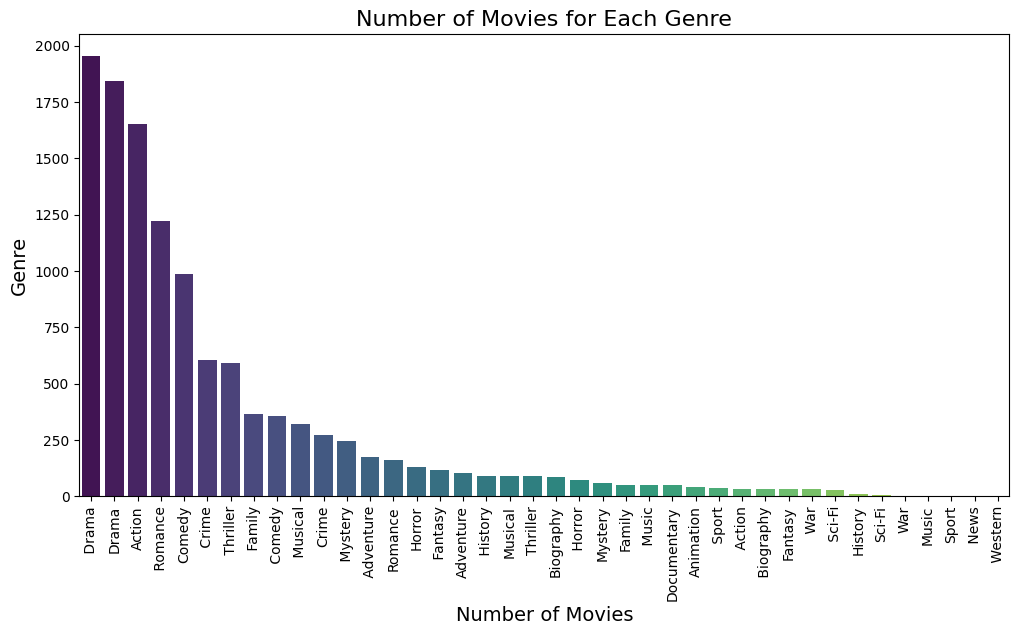

In [48]:
plt.figure(figsize=(12, 6))
# Use genre1 instead of genre_df
sns.countplot(data=genre1, x='Genre', order=genre1['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = movie_data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [50]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Votes,0.142563
Genre,0.121796
Actor 3,0.042413
Actor 2,0.041353
Actor 1,0.023430
Duration,0.001839
Director,-0.006824
Year,-0.204642


Modeling the project

In [51]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
X_test = np.array(X_test)


y_pred = model.predict(X_test)
print(y_pred)

[5.63683425 5.84694164 5.93283536 ... 6.02786817 5.89959597 5.36480764]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.08633120473998934
Mean squared error:  1.673779829083964
Mean absolute error:  1.0355603579570467


In [54]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
3021     8.3
9112     3.4
2240     4.9
1764     5.6
8055     4.5
Name: Rating, Length: 1698, dtype: float64
